# Setup

In [7]:
import design_tools_template as dt
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import fabs

# Caso de teste da função empty_weight

In [3]:
test = (
    232448.8612514016,
    17.311278299071514,
    [32939.95933267459,
        4819.756583850933,
        3962.4552,
        69621.52083852515,
        2726.498205,
        15450.156495,
        31067.321596350914,
        71861.19300000001]
)

In [4]:
W0_guess = 422712.9
T0_guess = 125600
Mach = 0.3
altitude = 10.668000000000001
n_engines_failed = 1
flap_def = 0.3490658503988659
slat_def = 0.0
lg_down = 1
h_ground = 10.668000000000001
aircraft = dt.default_aircraft()
dimensions = dt.geometry(aircraft)
nacelle = {
    'yn': 2.6,
    'zn': 0.0,
    'Ln': 4.3,
    'Dn': 1.5,
    'xn': 23.2
}
fus =  {
    'xcg': 16.4,
    'xnp': 16.9,
    'Lf': 32.8,
    'Df': 3.3
}
dimensions['nacelle'] = nacelle
dimensions['fus'] = fus
dimensions['ldg'] = aircraft['dimensions']['ldg']
aircraft['dimensions'] = dimensions
aero, CLmax = dt.aerodynamics(aircraft, Mach, altitude, n_engines_failed, flap_def, 
                                slat_def, lg_down, h_ground, W0_guess)


aircraft['dimensions']['fus']['Swet'] = aero['Swet_f']
dt.empty_weight(aircraft, W0_guess, T0_guess)

(232448.8612514016,
 17.311278299071514,
 [32939.95933267459,
  4819.756583850932,
  3962.4552,
  69621.52083852515,
  2726.498205,
  15450.156495,
  31067.321596350914,
  71861.19300000001])

# Caso de teste da função fuel_weight

In [5]:
CD0_cruise = 0.01857763638636
K_cruise = 0.04747410535245
altitude_cruise = 11000.00000000000000
Mach_cruise = 0.77000000000000
range_cruise = 2390000.00000000000000
C_cruise = 0.00019859928416
loiter_time = 2700.00000000000000
CD0_altcruise = 0.01948073140867
K_altcruise = 0.04633848260462
altitude_altcruise = 4572.00000000000000
Mach_altcruise = 0.40000000000000
range_altcruise = 370000.00000000000000
C_altcruise = 0.00018508237527

dt.fuel_weight(aircraft, W0_guess, CD0_cruise, 
                K_cruise, altitude_cruise, Mach_cruise, 
                range_cruise, C_cruise, loiter_time, 
                CD0_altcruise, K_altcruise, altitude_altcruise, 
                Mach_altcruise, range_altcruise, C_altcruise)

(99509.4311185458, 0.95569551)

# Caso de teste da função weight

In [6]:
T0_guess = 125600
W0_guess = 422712.9
altitude_cruise = 11000.0000
Mach_cruise = 0.7700000
range_cruise = 2390000.00000
loiter_time = 2700.00000
altitude_altcruise = 4572.00000
Mach_altcruise = 0.40000000
range_altcruise = 370000.00000

dt.weight(aircraft, W0_guess, T0_guess,
        altitude_cruise, Mach_cruise, range_cruise,
        loiter_time, altitude_altcruise, Mach_altcruise, range_altcruise)

(439776.60009163496,
 236794.43249269313,
 102998.64759894181,
 0.95569551,
 17.274672280063154,
 [33670.24024350807,
  4819.756583850932,
  3962.4552,
  69621.52083852515,
  2835.9753065561245,
  16070.526737151373,
  31067.321596350914,
  74746.63598675058])

# Exercícios

Crie um gráco de pizza (ou similar) mostrando o breakdown de pesos para a aeronave do caso de testes. Esse gráfico deve mostrar as porcentagens de peso correspondentes a carga-paga, tripulação, combustível e cada componente da aeronave.

In [23]:
weights = dt.weight(aircraft, W0_guess, T0_guess,
        altitude_cruise, Mach_cruise, range_cruise,
        loiter_time, altitude_altcruise, Mach_altcruise, range_altcruise)

weights = list(weights)
weights.append(aircraft['weights']['W_payload'])
weights.append(aircraft['weights']['W_crew'])

weights = [weights[-1], weights[-2], weights[2]] + weights[5]
weights

[4463.55,
 95519.97,
 102998.64759894181,
 33670.24024350807,
 4819.756583850932,
 3962.4552,
 69621.52083852515,
 2835.9753065561245,
 16070.526737151373,
 31067.321596350914,
 74746.63598675058]

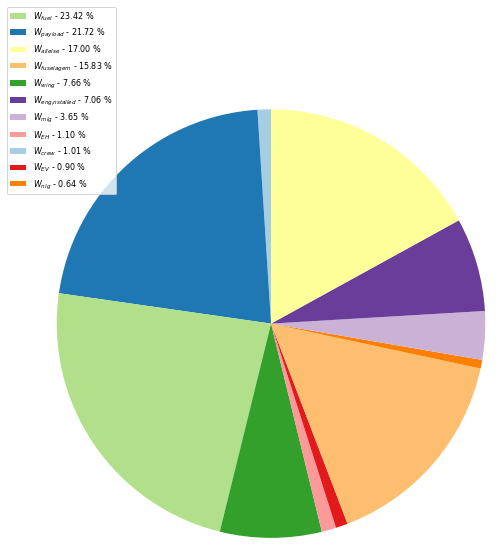

In [62]:
plt.figure(figsize=(8,9))
labels = ['$W_{crew}$', '$W_{payload}$', '$W_{fuel}$', '$W_{wing}$', '$W_{EH}$', '$W_{EV}$', '$W_{fuselagem}$', '$W_{nlg}$', '$W_{mlg}$', '$W_{eng_installed}$', '$W_{allelse}$']
colors = sns.color_palette('Paired')[:len(labels)]
patches, texts = plt.pie(weights, colors=colors, startangle=90, radius=1.2)
porcent = 100.*np.array(weights)/np.array(weights).sum()
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(labels, porcent)]

patches, labels, _ =  zip(*sorted(zip(patches, labels, porcent),
                                          key=lambda x: x[2],
                                          reverse=True))
plt.legend(patches, labels, loc='center left', bbox_to_anchor=(-0.1, 1.),
           fontsize=8)
plt.savefig("fig1.png", dpi=200)
plt.show()

Gere um plot de W0 como função de ARw (alongamento da asa) para o intervalo 7:0 < ARw < 14. Qual ARw
você escolheria baseando-se unicamente nesse plot?

In [74]:
ARw = np.linspace(7, 14, 100)
w0_vec = np.zeros(ARw.shape[0])
we_vec = np.zeros(ARw.shape[0])
for i in range(ARw.shape[0]):
    aircraft = dt.default_aircraft()
    aircraft['geo_param']['wing']['AR'] = ARw[i]
    dimensions = dt.geometry(aircraft)
    nacelle = {
        'yn': 2.6,
        'zn': 0.0,
        'Ln': 4.3,
        'Dn': 1.5,
        'xn': 23.2
    }
    fus =  {
        'xcg': 16.4,
        'xnp': 16.9,
        'Lf': 32.8,
        'Df': 3.3
    }
    dimensions['nacelle'] = nacelle
    dimensions['fus'] = fus
    dimensions['ldg'] = aircraft['dimensions']['ldg']
    aircraft['dimensions'] = dimensions
    weights = dt.weight(aircraft, W0_guess, T0_guess,
        altitude_cruise, Mach_cruise, range_cruise,
        loiter_time, altitude_altcruise, Mach_altcruise, range_altcruise)
    w0_vec[i] = weights[0]
    we_vec[i] = weights[1]

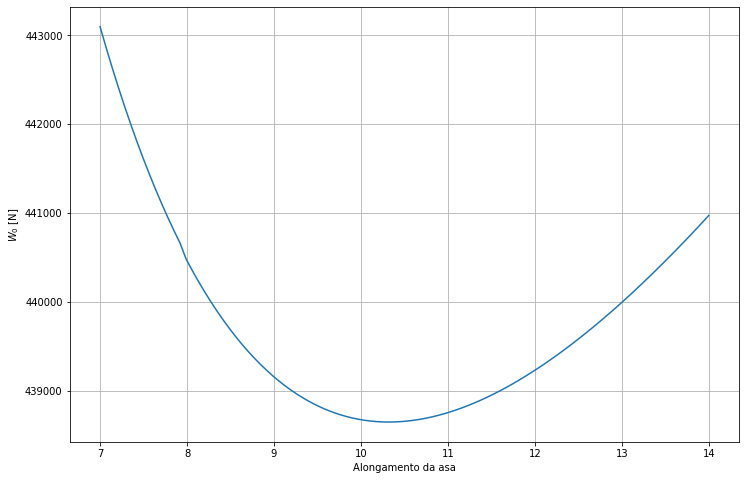

In [79]:
plt.figure(figsize=(12,8))
plt.grid(True)
plt.plot(ARw, w0_vec)
# plt.plot(ARw, we_vec)
plt.xlabel("Alongamento da asa")
plt.ylabel("$W_0$ [N]")
plt.savefig("fig2.png", dpi=200)
plt.show()